In [3]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

using JLD2, CairoMakie, GLMakie

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


rate_jac (generic function with 1 method)

In [5]:
# load first hom curve from matcont
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

# load Fold curves from matcont
I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:]

# index for start and end curves
index_start_hom_bt = 1; index_end_hom_bt = 8000;

In [6]:
# load 2d map
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Map LSE\\Hopf_Fold")

len = 250
map_dim = " $(len)x$(len) "
name = " tau_D article2 for Hopf Fold Hom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -0.7, -4.00,  length = len )
U0range = range( 0.4,  0.0, length = len )

0.4:-0.001606425702811245:0.0

In [7]:
# load Fold curves from bifurcationkit
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")
hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [8]:
index_lc_hom = 3800
I0_hom_bt[index_lc_hom], U0_hom_bt[index_lc_hom]

(-1.7441941605853748, 0.229424749082759)

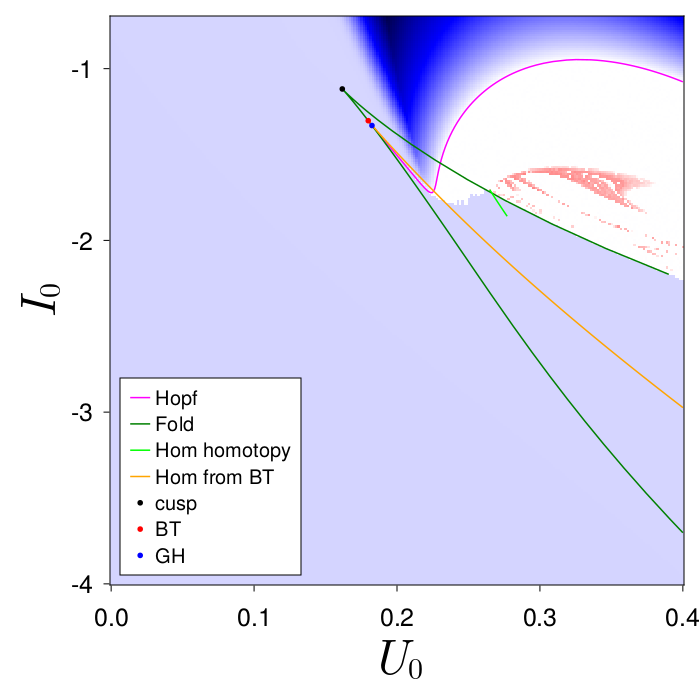

In [9]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))
mn, mx =  -absmax, absmax

I0start, I0end = 1, 250 #80, 200

U0start, U0end = 1, 250 #110, 120

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ticksize = 25
tickpad = 10.0
textsize = 25

ax = Axis(f[1, 1], xlabel = L"U_0",ylabel = L"I_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, U0range[U0start:U0end], I0range[I0start:I0end], transpose(Λs[I0start:I0end, U0start:U0end, index]),
colormap = :seismic, colorrange = (mn, mx))

lines!(ax, hp_codim2_1U0, hp_codim2_1I0, label = "Hopf", color = :magenta)
#lines!(ax, U0_Fold, I0_Fold, color = :green, label = "Fold")
lines!(ax, sn_codim2_1U0, sn_codim2_1I0, label = "Fold", color = :green)


lines!(u0_hom, I0_hom, label = "Hom homotopy", color = :lime)
lines!(ax, U0_hom_bt[index_start_hom_bt:index_end_hom_bt], I0_hom_bt[index_start_hom_bt:index_end_hom_bt], label = "Hom from BT", color = :orange)

scatter!(0.161724273501619, -1.1182463005483, label = "cusp", markersize = 8, color = :black)
scatter!(0.179884505801528, -1.30295711421099, label = "BT", markersize = 8, color = :red)
scatter!(0.182481513126737, -1.33112655468948, label = "GH", markersize = 8, color = :blue)


axislegend(ax, position = :lb, labelsize = 20)

#xlims!(0.16, 0.3)
#ylims!(-2.0, -1.0)

#ylims!(-4.0, -0.7)
#xlims!(0.0, 0.4)

display(f);

In [57]:
GLMakie.activate!()
display(GLMakie.Screen(), f);

In [ ]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\map_with_curve.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""